In [1]:
# some imports
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys

assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf

assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
# % matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12)
plt.rc('figure', figsize=(12, 5))

# Settings for the visualizations
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd

pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings

warnings.filterwarnings(action="ignore", message="^internal gelsd")
# Others
import cv2
import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from skimage.io import imread

 ## Import data

In [2]:
# Paths
X_train_path = './dataset/train/train/train/'
X_test_path = './dataset/test/test/test/'
dataset_csv = './dataset/train.txt'
dataset_csv_test = './dataset/test.txt'
dataset_train = './dataset/train/train'
dataset_test = './dataset/test/test'


In [3]:
_STOP = 20000


def preprocess(img_paths, dataset_path, preprocess_img_method=None):
    print("loading data")
    data = []
    stop = 0
    for img_path in tqdm.tqdm(img_paths):
        path = os.path.realpath(os.path.join(dataset_path, img_path[1:]))
        img = imread(path)
        if preprocess_img_method:
            img = preprocess_img_method(img)
        else:
            # img = cv2.resize(img,(224,224),cv2.INTER_AREA)
            img = img / 255.  #normalize
        data.append(img)
        stop += 1
        if (stop == _STOP):
            break
    print("loading data done")
    return data


def preprocess_img_vgg(img):
    return preprocess_input(img)


In [ ]:
df = pd.read_csv(dataset_csv, delimiter='\ ', header=None)
y_train_full = np.array(df[1])[:_STOP]
img_paths = df[0]
X_train_full = preprocess(df[0], dataset_train, preprocess_img_method=None)
X_train_full = np.stack(X_train_full)

C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


loading data


 14%|█▍        | 2090/15000 [00:02<00:13, 979.78it/s]

In [5]:
def one_hot(a, num_classes):
    return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

In [6]:
# n_classes = np.max(y_train_full)+1
# # transform output
# new_y_train=[]
# for val in y_train_full:
#     list = [0]*n_classes
#     list[val] = 1
#     new_y_train.append(np.array(list))
# new_y_train=np.stack(new_y_train)

In [6]:
no_classes = np.max(y_train_full) + 1
y_train_one_hot = one_hot(y_train_full, no_classes)
print(y_train_one_hot.shape)

(15000, 30)


In [7]:
# Split dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_one_hot, random_state=42, test_size=0.1)
X_train = X_train.astype("float32")
X_valid = X_valid.astype("float32")
y_train = y_train.astype("float32")
y_valid = y_valid.astype("float32")

In [9]:
print(X_train[0].shape)
print(X_train[0])
print(len(X_train))
print(len(y_train))
print(len(X_valid))
print(len(y_valid))
print(len(X_train))
print(X_train[0].shape)
print(type(X_train))
print(X_train.shape)

print(type(X_train[0]))
print(y_train[:10])

(158, 158)
[[0.45490196 0.4        0.42745098 ... 0.30588236 0.24313726 0.33333334]
 [0.33333334 0.34509805 0.47058824 ... 0.35686275 0.23529412 0.37254903]
 [0.41960785 0.4117647  0.4745098  ... 0.38431373 0.30588236 0.34117648]
 ...
 [0.49803922 0.5294118  0.5372549  ... 0.8        0.7882353  0.8509804 ]
 [0.5568628  0.54509807 0.5568628  ... 0.7921569  0.7647059  0.8509804 ]
 [0.5568628  0.57254905 0.59607846 ... 0.83137256 0.7764706  0.9019608 ]]
13500
13500
1500
1500
13500
(158, 158)
<class 'numpy.ndarray'>
(13500, 158, 158)
<class 'numpy.ndarray'>
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

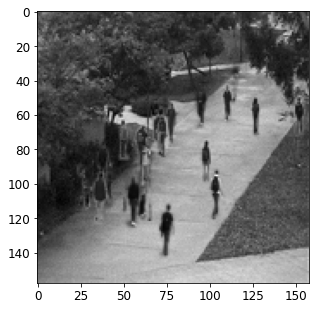

In [8]:
plt.imshow(X_train[1], cmap='gray')


## Model

In [9]:
tf.random.set_seed(42)
np.random.seed(42)

In [10]:
def get_uncompiled_model():
    model = keras.models.Sequential([
        keras.layers.Reshape([158, 158, 1], input_shape=[158, 158]),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal"),
        keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal"),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal"),
        keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal"),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal"),
        keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal"),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(128, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal"),
        keras.layers.Conv2D(128, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal"),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(256, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal"),
        keras.layers.Conv2D(256, kernel_size=3, padding="SAME", activation="selu", kernel_initializer="he_normal"),
        keras.layers.MaxPool2D(pool_size=2),
        keras.layers.Flatten(name="flatten1"),
        keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(no_classes, activation="linear", name="prediction")
    ])
    return model


def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer=keras.optimizers.SGD(lr=1e-5, decay=(5 * 1e-5), momentum=0.95),  # Optimizer
        # Loss function to minimize
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        # List of metrics to monitor
        metrics=["accuracy", root_mean_squared_error]
    )
    return model

#TODO
# model = keras.models.Sequential([conv_encoder, conv_decoder])

In [11]:
def RMSE(y_true, y_pred):
    # y_truess.append(y_true)
    # y_predss.append(y_pred)
    tf.print(y_true, "This is y_true")
    tf.print(y_pred, "This is y_pred")
    return tf.sqrt(tf.reduce_mean((y_true - y_pred) ** 2))


def root_mean_squared_error_debug(y_true, y_pred):
    tf.print("This is y_true\n", type(y_true))
    tf.print("This is y_true\n", y_true[0].shape)
    tf.print("This is y_true\n", y_true)
    # proto_tensor = y_pred.clone()  # convert `tensor a` to a proto tensor
    # tf.make_ndarray(proto_tensor)
    # print(proto_tensor)
    y1 = tf.math.argmax(y_true, axis=-1)
    tf.print("here\n", y1)
    tf.print("here\n", type(y1))

    y2 = tf.math.argmax(y_pred, axis=-1)
    tf.print("here\n", y2)
    tf.print("here\n", type(y2))

    tf.print("======", tf.math.reduce_mean(tf.square(y1 - y2)))

    tf.print("======", tf.cast(tf.math.reduce_mean(tf.square(y1 - y2)), tf.float64))
    tf.print("======", tf.sqrt(tf.cast(tf.math.reduce_mean(tf.square(y1 - y2)), tf.float64)))
    ###
    # b = [tf.math.argmax(y_true[i]) for i in range(len(y_true))]
    # b = tf.math.maximum(a)
    # tf.print("here\n",b)
    tf.print("This is y_pred\n", y_pred)

    ##
    tf.print("--->", tf.sqrt(tf.math.reduce_mean(tf.square(y_pred - y_true), axis=-1)))
    tf.print("--->", tf.sqrt(tf.cast(tf.math.reduce_mean(tf.square(y1 - y2)), tf.float64)))

    # return tf.sqrt(tf.math.reduce_mean(tf.square(y_pred - y_true),axis=-1))
    return tf.sqrt(tf.cast(tf.math.reduce_mean(tf.square(y1 - y2)), tf.float64))


def root_mean_squared_error(y_true, y_pred):
    y1 = tf.math.argmax(y_true, axis=-1)
    y2 = tf.math.argmax(y_pred, axis=-1)
    return tf.sqrt(tf.cast(tf.math.reduce_mean(tf.square(y1 - y2)), tf.float64))

In [12]:
class CustomMSE(keras.losses.Loss):
    def __init__(self, regularization_factor=0.1, name="custom_mse"):
        super().__init__(name=name)
        self.regularization_factor = regularization_factor

    def call(self, y_true, y_pred):
        # print(str(y_true)," - " , str(y_pred))
        mse = tf.math.reduce_mean(tf.square(y_true - y_pred))
        reg = tf.math.reduce_mean(tf.square(0.5 - y_pred))
        return mse + reg * self.regularization_factor

In [13]:
# Prepare a directory to store all the checkpoints.
checkpoint_dir = "./ckpt/mcc-2-complex"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)


def make_or_restore_model():
    # Either restore the latest model, or create a fresh one
    # if there is no checkpoint available.
    checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]

    if checkpoints:
        latest_checkpoint = max(checkpoints, key=os.path.getctime)
        print("Restoring from", latest_checkpoint)
        return keras.models.load_model(latest_checkpoint)
    print("Creating a new model")
    return get_compiled_model()

def make_or_restore_model_weights_only_uncompiled():
    model = get_uncompiled_model()
    # checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    if latest:
        model.load_weights(latest)
        print("Restoring from", latest)
    return model

def restore_model():
    checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    if checkpoints:
        latest_checkpoint = max(checkpoints, key=os.path.getctime)
        print("Restoring from", latest_checkpoint)
        return keras.models.load_model(latest_checkpoint)


def restore_model_weights_only():
    model = get_compiled_model()
    # checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    print("Restoring from", latest)
    model.load_weights(latest)
    return model


def restore_model_weights_only_uncompiled():
    model = get_uncompiled_model()
    # checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    print("Restoring from", latest)
    model.load_weights(latest)
    return model


### Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

# configure early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
###

### Model saving
model_saving = keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath=checkpoint_dir + "/ckpt_{epoch}_loss={loss:.4f}_val_loss={val_loss:.4f}",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        save_weights_only=True,
        mode="min",
        verbose=1,
    )
###

### init callbacks
callbacks = [
    model_saving,
    early_stopping
]

In [46]:
model = get_compiled_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 158, 158, 1)       0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 158, 158, 1)       4         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 158, 158, 16)      160       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 158, 158, 16)      2320      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 79, 79, 16)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 79, 79, 16)        64        
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 79, 79, 32)       

In [47]:
model = make_or_restore_model_weights_only_uncompiled()

rmse = tf.keras.metrics.RootMeanSquaredError()
sgd = tf.keras.optimizers.SGD(lr=1e-5, decay=(5 * 1e-5), momentum=0.95)
model.compile(
    # optimizer=keras.optimizers.SGD(lr=1e-5, decay=(5 * 1e-5), momentum=0.95),  # Optimizer
    optimizer=keras.optimizers.SGD(lr=5e-5, decay=(5 * 1e-5), momentum=0.95),  # Optimizer
    # Loss function to minimize
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    # List of metrics to monitor
    metrics=["accuracy", root_mean_squared_error]
)
# model.compile(optimizer=sgd, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[root_mean_squared_error,'accuracy'])#['accuracy','mse'])
# model.compile(optimizer=sgd, loss=root_mean_squared_error, metrics=[root_mean_squared_error,'accuracy'])#['accuracy','mse'])
# model.compile(optimizer=sgd, loss=root_mean_squared_error, metrics=['loss'])#['accuracy','mse'])

Restoring from ./ckpt/mcc-2-complex\ckpt_29_loss=1.2157_val_loss=1.4604


In [18]:
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    # validation_data=(X_valid, y_valid),
    validation_split=0.2,
    shuffle=True,
    callbacks=callbacks
)
pd.DataFrame(history.history).plot(figsize=(8, 5))


Fit model on training data
Epoch 1/50
338/338 [==============================] - ETA: 0s - loss: 4.7648 - accuracy: 0.0612 - root_mean_squared_error: 8.8895  

KeyboardInterrupt: 

In [16]:
y_valid_test = [np.argmax(val) for val in y_valid]
n = len(y_valid_test)

In [45]:
preds = []
for data in X_valid[:n]:
    pred = model.predict(data[np.newaxis, :, :])
    preds.append((np.argmax(pred)))

preds = np.array(preds)
vals = np.array(y_valid_test[:n])
rmse = [np.sqrt(np.sum(np.square(preds - vals)) / n)]
print(rmse)

[1.3660161053223348]
[1.3660161053223348]


In [18]:
print(rmse)

[1.33566462856512]


In [56]:
print(rmse)


[3.8075188771692257]


# Tests


In [ ]:
# Save Model

In [ ]:
model.save('./ckpt/aa2/', save_format='tf')

In [ ]:
model = tf.keras.models.load_model('./ckpt/aa2/')

In [ ]:
## TEST restore weights
model = restore_model_weights_only()
# Re-evaluate the model
loss, acc, rmse = model.evaluate(X_valid, y_valid, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))
print(rmse)

## Submission

In [25]:
# Submission
df_test = pd.read_csv(dataset_csv_test, delimiter='\ ', header=None)
print(df_test)

                                     0
0    /test/test_composite000000001.png
1    /test/test_composite000000000.png
2    /test/test_composite000000002.png
3    /test/test_composite000000003.png
4    /test/test_composite000000004.png
..                                 ...
495  /test/test_composite000000495.png
496  /test/test_composite000000496.png
497  /test/test_composite000000497.png
498  /test/test_composite000000498.png
499  /test/test_composite000000499.png

[500 rows x 1 columns]


C:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [26]:
X_test_full = preprocess(df_test[0], dataset_test, preprocess_img_method=None)
X_test_full = np.stack(X_test_full)

loading data


100%|██████████| 500/500 [00:00<00:00, 1328.58it/s]

loading data done


In [27]:
#Predict
preds = model.predict(X_test_full)

In [29]:
predictions = []
for pred in preds:
    predictions.append((np.argmax(pred)))

In [30]:
print(predictions)

[23, 25, 12, 25, 23, 12, 25, 23, 1, 8, 19, 2, 4, 23, 17, 6, 9, 3, 28, 15, 4, 20, 25, 12, 14, 0, 5, 2, 9, 2, 9, 23, 12, 20, 29, 0, 16, 11, 2, 6, 13, 16, 6, 26, 15, 20, 14, 29, 2, 18, 23, 3, 23, 8, 1, 25, 5, 12, 20, 28, 23, 20, 18, 2, 3, 13, 0, 3, 8, 12, 22, 1, 0, 11, 29, 9, 8, 14, 13, 25, 6, 19, 29, 25, 2, 20, 25, 28, 22, 20, 20, 22, 29, 3, 25, 28, 17, 10, 1, 3, 6, 11, 25, 23, 28, 6, 14, 29, 18, 6, 28, 20, 25, 23, 28, 10, 10, 6, 9, 10, 28, 5, 6, 20, 13, 14, 6, 23, 2, 15, 28, 22, 6, 14, 20, 15, 4, 22, 7, 3, 14, 5, 16, 14, 0, 15, 22, 23, 19, 10, 4, 18, 17, 24, 8, 1, 19, 17, 20, 23, 0, 11, 13, 15, 17, 18, 9, 18, 26, 8, 13, 9, 20, 14, 7, 7, 25, 28, 2, 28, 1, 28, 3, 17, 7, 7, 20, 23, 28, 13, 18, 10, 23, 28, 18, 15, 12, 22, 9, 28, 28, 10, 28, 9, 23, 23, 20, 28, 23, 5, 25, 23, 11, 22, 25, 13, 5, 6, 17, 0, 15, 1, 25, 25, 22, 5, 25, 13, 8, 1, 25, 28, 5, 23, 14, 7, 17, 25, 8, 0, 10, 17, 6, 2, 13, 25, 4, 9, 28, 10, 6, 13, 11, 1, 12, 8, 28, 2, 28, 11, 25, 0, 28, 28, 2, 5, 0, 7, 10, 2, 6, 3, 17, 25,

In [33]:
indexes = []
for i in range(len(predictions)):
    indexes.append(i)

In [34]:
print(indexes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [38]:
import csv
import pandas
df = pandas.DataFrame(data={"index": indexes, "prediction": predictions})
df.to_csv("./file.csv", sep=',',index=False)